In [1]:
import os
# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbbai-azure-ai-document-intelligence"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to C:\Users\pablosal\Desktop\gbbai-azure-ai-document-intelligence


In [2]:
from src.ocr.transformer import GPT4VisionManager

gpt_vision_client = GPT4VisionManager()
gpt_vision_client.load_environment_variables_from_env_file()

In [3]:
image_file_path = "C:\\Users\\pablosal\\Desktop\\gbbai-azure-ai-search-indexing\\notebooks\\dev\\images\\instruction-manual-fisher-ewd-ews-ewt-valves-through-nps-12x8-en-124788-page-3.png"  # Update with your image path
sys_message = "You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables."
user_prompt = '''Can you analyze this document? Please provide a summary first and then include key information and details from tables and diagrams as bullet points.
I need all the information in detail and with a lot of granularity to make sure all the details are captured. The intention is another system will read this information and understand
in detail the context and be able to answer precise questions.'''

2024-01-04 13:23:04,626 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:125)
2024-01-04 13:23:04,628 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Can you analyze this document? Please provide a summary first and then include key information and details from tables and diagrams as bullet points.\nI need all the information in detail and with a lot of granularity to make sure all the details are captured. The intention is another system will read this information and understand\nin detail the context and be able to answer precise questions.'}]}] (transformer.py:prepare_instruction:129)
2024-01-04 13:23:04,629 - micro - MainProcess - INFO     Image URL added to user message successfully. (transforme

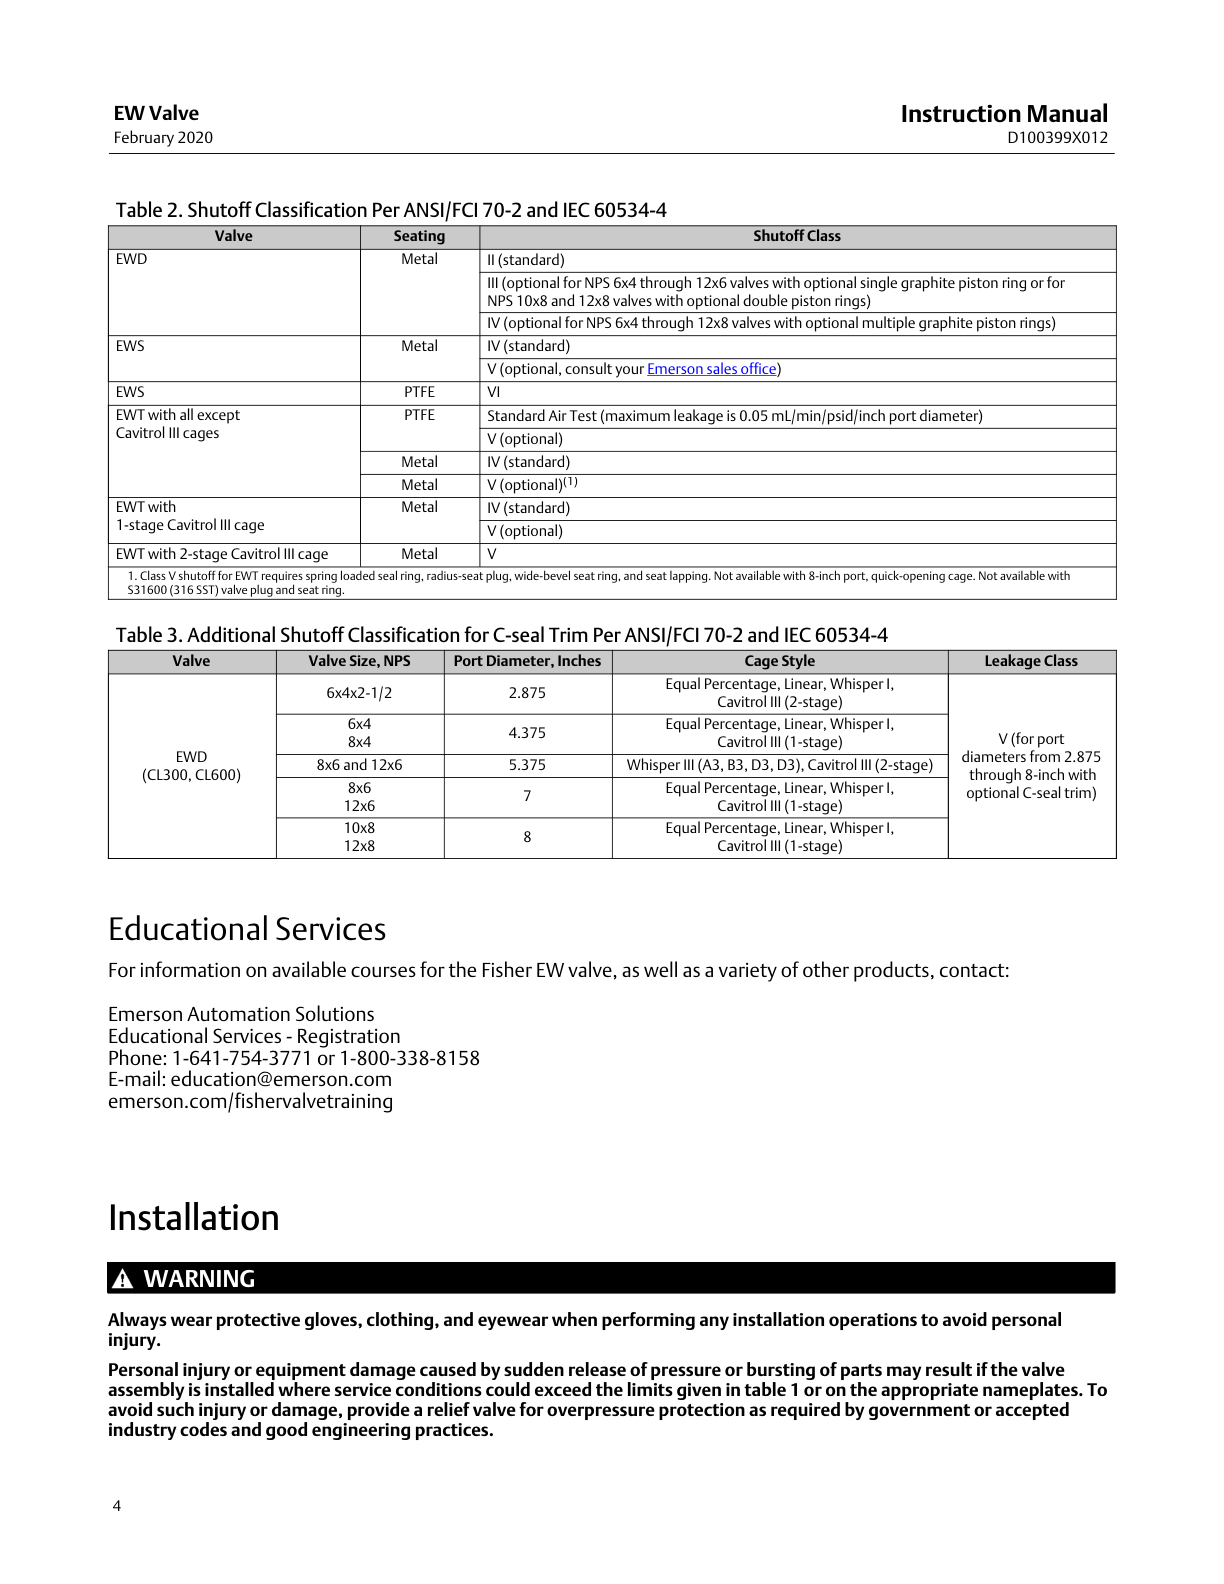

Summary:
This document is an Instruction Manual for the EW Valve dated February 2020. It includes detailed shutoff classification for various valve seating and sizes according to ANSI/FCI 70-2 and IEC 60534-4 standards. It also provides additional shutoff classification for C-seal Trim. Educational Services information for further training on the Fisher EW valve is given, along with a warning advisory for installation procedures.

Key Information and Details:
- EW Valve Instruction Manual is identified as D100399X012, published in February 2020.

Table 2. Shutoff Classification Per ANSI/FCI 70-2 and IEC 60534-4:
- EWD Valve with metal seating has a standard shutoff classification of Class II, with optional Class III and IV for certain NPS sizes and configurations.
- EWS Valve with metal seating has a standard shutoff classification of Class IV, with an optional Class V after consultation.
- EWS Valve with PTFE seating has a shutoff classification of Class VI.
- EWT Valve (excluding PTF

In [4]:
ocr_recognizer = gpt_vision_client.call_gpt4v_image(image_file_path,system_instruction=sys_message,
                                   user_instruction=user_prompt, 
                                   ocr=True, 
                                   use_vision_api=False,
                                   display_image=True,
                                   max_tokens=2000)
print(ocr_recognizer)

2024-01-04 13:23:27,883 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:125)
2024-01-04 13:23:27,885 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Can you analyze this document? Please provide a summary first and then include key information and details from tables and diagrams as bullet points.\nI need all the information in detail and with a lot of granularity to make sure all the details are captured. The intention is another system will read this information and understand\nin detail the context and be able to answer precise questions.'}]}] (transformer.py:prepare_instruction:129)
2024-01-04 13:23:27,885 - micro - MainProcess - INFO     Image URL added to user message successfully. (transforme

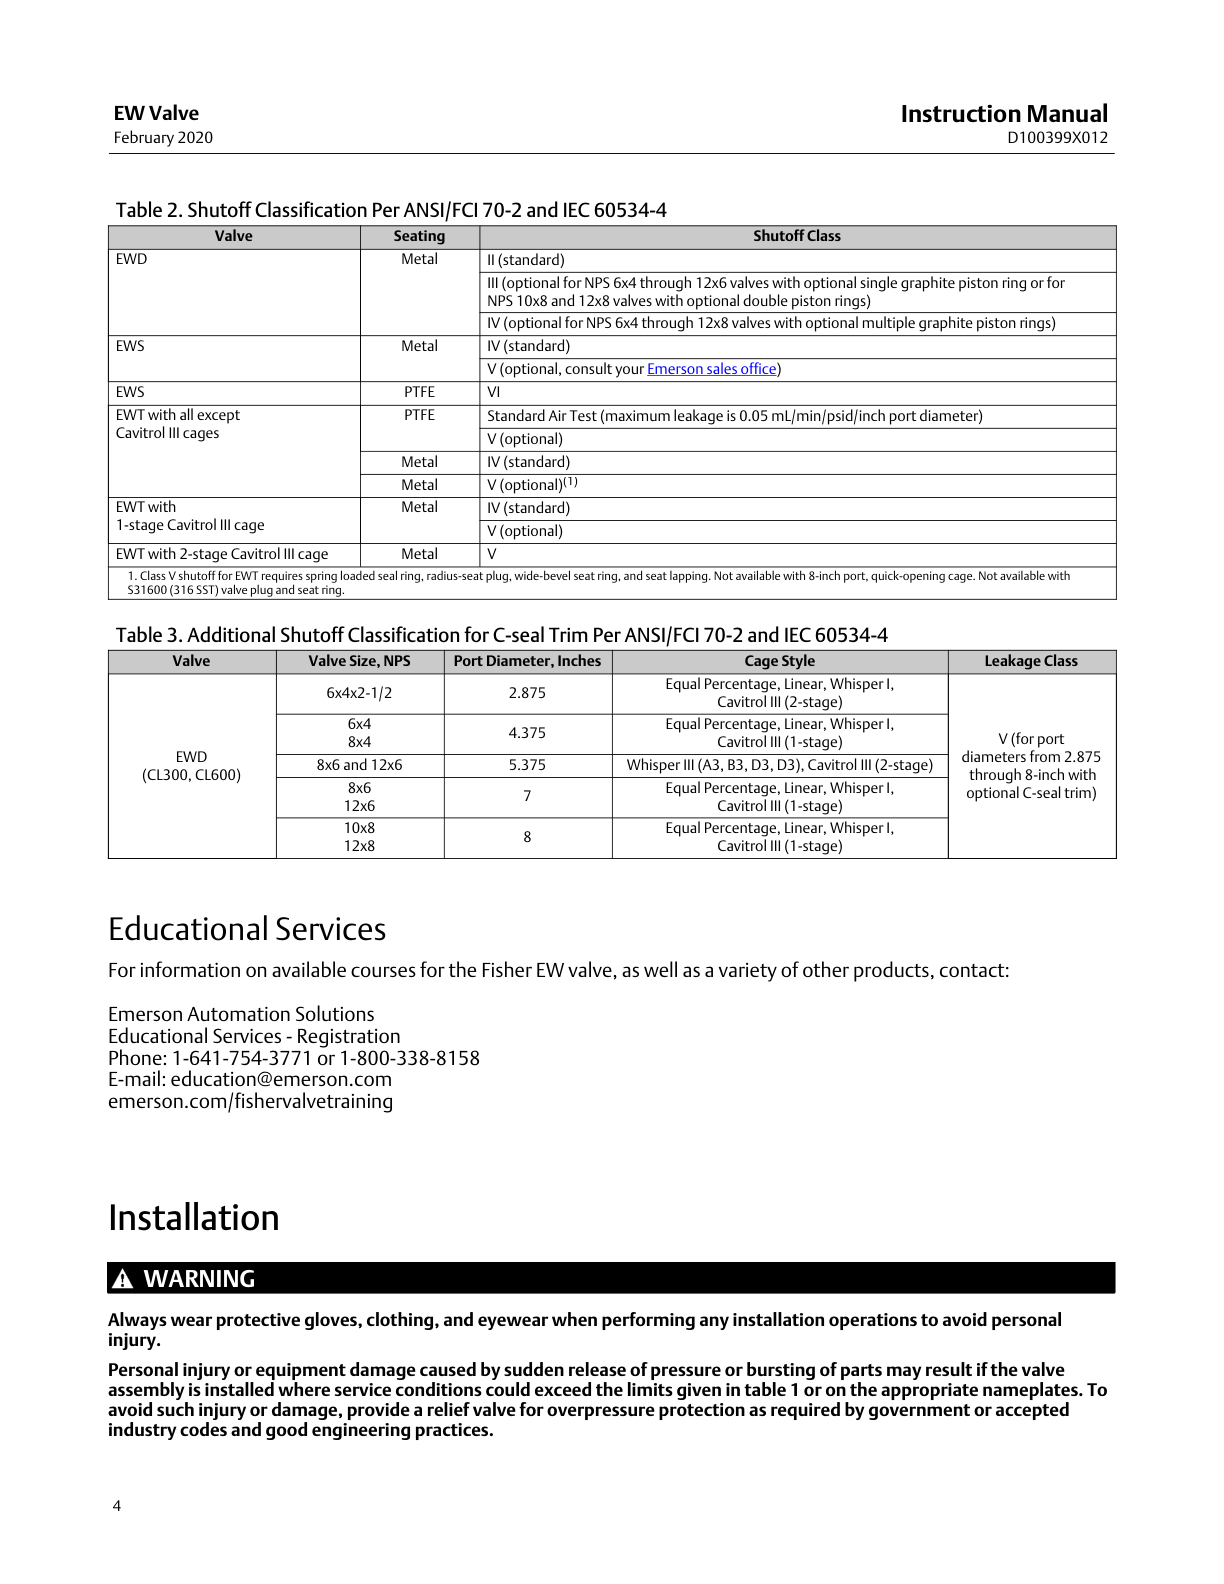

Summary:
This document is an instruction manual for the Fisher EW Valve, dated February 2020. It includes detailed shutoff classifications for the valve according to ANSI/FCI 70-2 and IEC 60534-4 standards. The manual provides two tables with specific shutoff classes for various configurations of the EW valve, detailing the seating material, valve size, port diameter, cage style, and the applicable leakage class. Additionally, the document mentions Educational Services for training related to the EW valve and other products offered by Emerson Automation Solutions. There is also an installation warning advising the use of protective gear to avoid personal injury and to ensure that a relief valve is provided for overpressure protection in accordance with government or industry codes and practices.

Key Information and Details:

- **Table 2. Shutoff Classification Per ANSI/FCI 70-2 and IEC 60534-4:**
  - EWD valves with metal seating have standard shutoff class II, with optional class III

In [5]:
ocr_recognizer_plus_vision = gpt_vision_client.call_gpt4v_image(image_file_path,system_instruction=sys_message,
                                   user_instruction=user_prompt, 
                                   ocr=True, 
                                   use_vision_api=True,
                                   display_image=True,
                                   max_tokens=2000)
print(ocr_recognizer_plus_vision)